2024-11-02 15:29:43.321866: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730557783.335273   58931 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730557783.339323   58931 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 15:29:43.354533: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1730557792.753672   58931 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21

Epoch 1/50


I0000 00:00:1730557810.395826   59027 service.cc:148] XLA service 0x7041ac0034c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730557810.395858   59027 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-11-02 15:30:10.937157: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730557812.888960   59027 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-02 15:30:13.999507: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_9642', 4 bytes spill stores, 4 bytes spill loads

2024-11-02 15:30:14.263549: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_9480',

  3/625 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.1615 - loss: 3.9022   

I0000 00:00:1730557826.685187   59027 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2073 - loss: 2.5751

2024-11-02 15:30:52.062138: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1708', 92 bytes spill stores, 92 bytes spill loads



625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 45ms/step - accuracy: 0.2074 - loss: 2.5746 - val_accuracy: 0.3114 - val_loss: 2.0470 - learning_rate: 1.0000e-04
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.3513 - loss: 1.8225 - val_accuracy: 0.3829 - val_loss: 1.7500 - learning_rate: 1.0000e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4259 - loss: 1.6086 - val_accuracy: 0.4110 - val_loss: 1.7496 - learning_rate: 1.0000e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4763 - loss: 1.4774 - val_accuracy: 0.4242 - val_loss: 1.6803 - learning_rate: 1.0000e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.5159 - loss: 1.3665 - val_accuracy: 0.4420 - val_loss: 1.6306 - learning_rate: 1.0000e-04
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.5430 - loss: 1.2871 - val_accuracy: 0.4497 - val_loss: 1.6963 - learning_rate: 1.0000e-04
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accurac

2024-11-02 15:37:53.936219: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1708', 92 bytes spill stores, 92 bytes spill loads

2024-11-02 15:37:53.947180: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1708', 384 bytes spill stores, 384 bytes spill loads



Test loss: 1.5915
Test accuracy: 0.4672


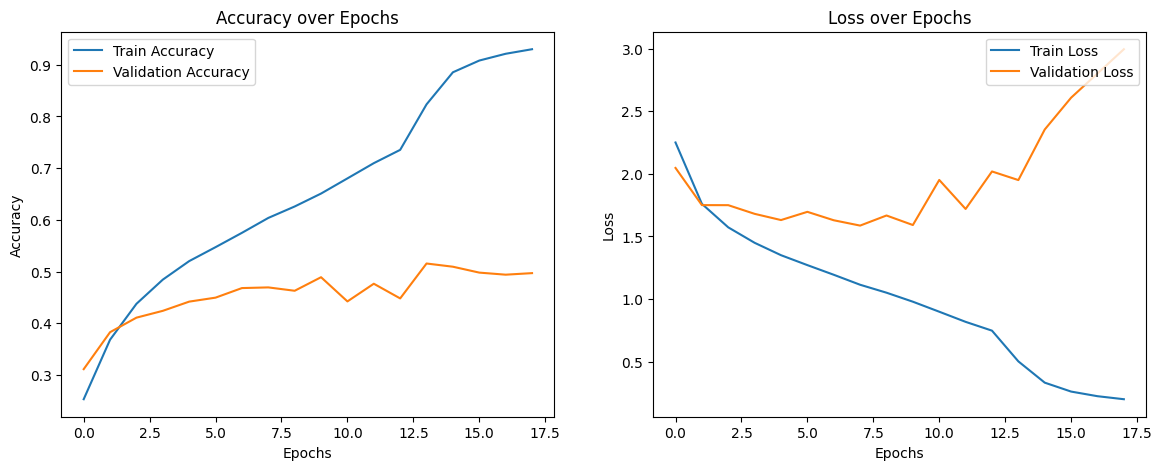

ValueError: Input 0 of layer "functional" is incompatible with the layer: expected shape=(None, 32, 32, 6), found shape=(None, 32, 32, 3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Ensure TensorFlow is set up correctly
assert tf.__version__ >= "2.0", "This code requires TensorFlow 2.0 or higher."

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Constants
INPUT_SHAPE = (32, 32, 6)
NUM_CLASSES = 10
BATCH_SIZE = 64
EPOCHS = 50
LEARNING_RATE = 0.0001

def load_and_preprocess_data():
    """
    Loads the CIFAR-10 dataset and preprocesses it for training with FFT applied
    to the data, returning the real and imaginary parts as separate channels.
    """
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Normalize the images to [0, 1] range
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Apply FFT to each image and separate the real and imaginary parts
    def fft_transform(data):
        fft_data = np.fft.fft2(data, axes=(1, 2))  # Apply FFT to the spatial dimensions
        fft_data_shifted = np.fft.fftshift(fft_data, axes=(1, 2))  # Shift zero frequency to center
        real_part = np.real(fft_data_shifted)
        imag_part = np.imag(fft_data_shifted)
        # Concatenate real and imaginary parts along the last axis to create separate channels
        return np.concatenate([real_part, imag_part], axis=-1)

    x_train_fft = fft_transform(x_train)
    x_test_fft = fft_transform(x_test)

    # One-hot encode the labels
    y_train = to_categorical(y_train, NUM_CLASSES)
    y_test = to_categorical(y_test, NUM_CLASSES)

    return x_train_fft, y_train, x_test_fft, y_test

def build_model(input_shape, num_classes):
    """
    Builds a CNN model using a modified architecture to support 6-channel input for CIFAR-10 classification.
    """
    # Use a custom input layer to handle 6-channel input
    inputs = Input(shape=input_shape)
    base_model = ResNet50(
        weights=None,  # Set to None to handle 6-channel input, as pre-trained weights are for 3-channel
        include_top=False,
        input_tensor=inputs
    )

    # Create the full model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

def get_callbacks():
    """
    Returns a list of callbacks for training.

    Returns:
        list: List of Keras callbacks.
    """
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_saver = ModelCheckpoint('best_resnet_model_cifar10_fft.keras', monitor='val_accuracy', mode='max', save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

    return [early_stopping, model_saver, reduce_lr]

def train_model(model, x_train, y_train, x_val, y_val, batch_size, epochs):
    """
    Trains the CNN model on the training data.

    Args:
        model (Sequential): Keras model to be trained.
        x_train (numpy.array): Training images.
        y_train (numpy.array): Training labels.
        x_val (numpy.array): Validation images.
        y_val (numpy.array): Validation labels.
        batch_size (int): Batch size for training.
        epochs (int): Number of epochs for training.

    Returns:
        history: Training history object.
    """
    callbacks = get_callbacks()

    history = model.fit(x_train, y_train,
                        validation_data=(x_val, y_val),
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=callbacks,
                        verbose=1)

    return history

def evaluate_model(model, x_test, y_test):
    """
    Evaluates the trained model on the test data.

    Args:
        model (Sequential): Trained Keras model.
        x_test (numpy.array): Test images.
        y_test (numpy.array): Test labels.

    Returns:
        loss (float): Test loss.
        accuracy (float): Test accuracy.
    """
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test loss: {loss:.4f}")
    print(f"Test accuracy: {accuracy:.4f}")

    return loss, accuracy

# Load and preprocess data
x_train, y_train, x_test, y_test = load_and_preprocess_data()

# Split the training data into training and validation sets
x_val, y_val = x_train[-10000:], y_train[-10000:]
x_train, y_train = x_train[:-10000], y_train[:-10000]

# Build the model
model = build_model(INPUT_SHAPE, NUM_CLASSES)

# Train the model
history = train_model(model, x_train, y_train, x_val, y_val, BATCH_SIZE, EPOCHS)

# Evaluate the model on the test set
evaluate_model(model, x_test, y_test)

# Function to plot training and validation curves
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

# Call the plot function after training
plot_training_history(history)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5228 - loss: 1.9345
Test Loss: 1.9573
Test Accuracy: 0.5187
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step


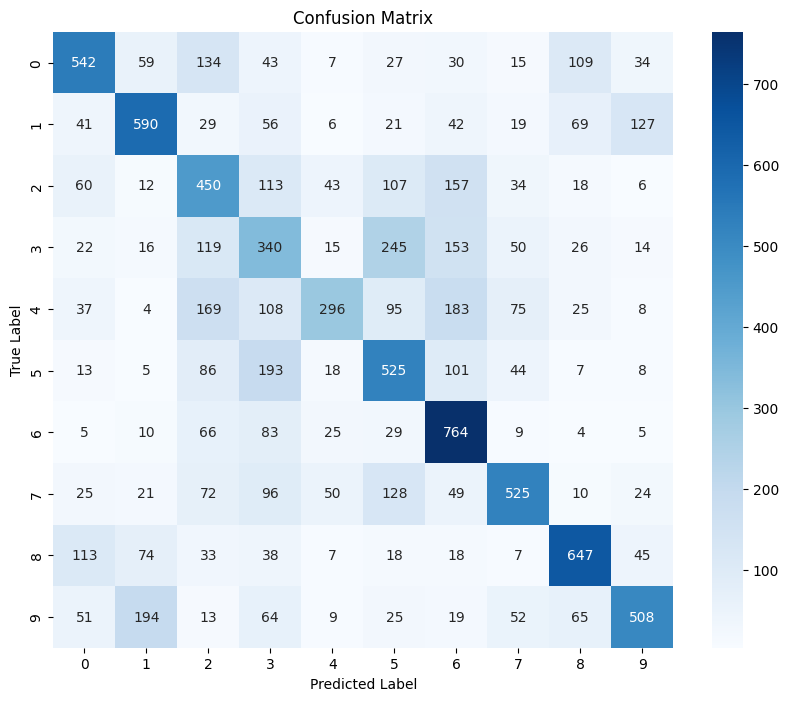


Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.54      0.57      1000
           1       0.60      0.59      0.59      1000
           2       0.38      0.45      0.41      1000
           3       0.30      0.34      0.32      1000
           4       0.62      0.30      0.40      1000
           5       0.43      0.53      0.47      1000
           6       0.50      0.76      0.61      1000
           7       0.63      0.53      0.57      1000
           8       0.66      0.65      0.65      1000
           9       0.65      0.51      0.57      1000

    accuracy                           0.52     10000
   macro avg       0.54      0.52      0.52     10000
weighted avg       0.54      0.52      0.52     10000



In [2]:

# Load the saved model
model = load_model('best_resnet_model_cifar10_fft.keras')

# Load CIFAR-10 test dataset
(_, _), (X_test, Y_test) = cifar10.load_data()

# Normalize the test data
X_test = X_test.astype('float32') / 255.0

# Apply FFT to the test data and separate the real and imaginary parts
def fft_transform(data):
    fft_data = np.fft.fft2(data, axes=(1, 2))  # Apply FFT to the spatial dimensions
    fft_data_shifted = np.fft.fftshift(fft_data, axes=(1, 2))  # Shift zero frequency to center
    real_part = np.real(fft_data_shifted)
    imag_part = np.imag(fft_data_shifted)
    # Concatenate real and imaginary parts along the last axis to create separate channels
    return np.concatenate([real_part, imag_part], axis=-1)

# Transform the test data
X_test_fft = fft_transform(X_test)

# One-hot encode the labels
Y_test_one_hot = to_categorical(Y_test, NUM_CLASSES)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_fft, Y_test_one_hot, verbose=1)

# Print the evaluation metrics
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions for the confusion matrix
Y_pred = model.predict(X_test_fft)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert one-hot predictions to class labels

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report for precision, recall, f1-score for each class
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_classes))
